0.8166666666666667


Saving 1.jpg to 1.jpg


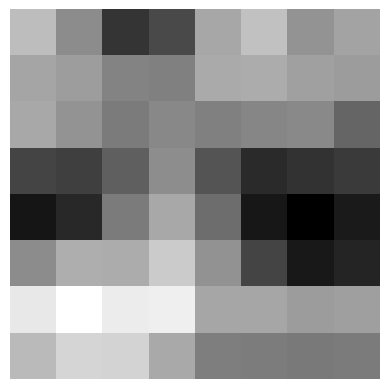

3


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from skimage.feature import hog
from skimage.transform import resize
from google.colab import files

digits=datasets.load_digits()
x=digits.images
y=digits.target

features=[]
for img in x:
    f=hog(img,pixels_per_cell=(4,4),cells_per_block=(1,1),orientations=9)
    features.append(f)

features=np.array(features)

xtrain,xtest,ytrain,ytest=train_test_split(features,y,test_size=0.2,random_state=42)

model=SVC(kernel="linear")
model.fit(xtrain,ytrain)

ypred=model.predict(xtest)
acc=accuracy_score(ytest,ypred)
print(acc)

uploaded=files.upload()

for name in uploaded.keys():
    img=cv2.imread(name)
    if len(img.shape)==3:
        img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    img=resize(img,(8,8),anti_aliasing=True)
    img=img/img.max()
    img=1-img

    plt.imshow(img,cmap="gray")
    plt.axis("off")
    plt.show()

    f=hog(img,pixels_per_cell=(4,4),cells_per_block=(1,1),orientations=9)
    pred=model.predict([f])
    print(pred[0])
